# Funciones de distribución de probabilidad

## Distruibuciones de probabilidad

Al hablar de una variable aleatoria, el conteo de veces que esa variable toma `x` valor (concreto o rango) se le llama función o distribución de probabilidad (`PDF`).

Esta función ocurre con un valor concreto de la variable aleatoria.

Sin embargo, este valor concreto nos dice poco, y es prácticamente imposible que la variable tome un valor concreto (tiene probabilidad 0). 

En lugar de ello, una variable aleatoria se puede definir por la función de distribución acumulada (`CDF`), que representa la probabilidad de que la variable tome un valor menor o igual a un valor concreto. 

En el gráfico típico de distribución, corresponde con el área bajo la curva de frecuencia (`PDF`). Y en estos gráficos, el área bajo la curva de frecuencia (a ambos lados de x) siempre toma valor 1.

**Probability Distribution Function**
`PDF` : `f(x) = P(X = x)`
**Cumulative Distribution Function**
`CDF` : `F(x) = P(X <= x)`

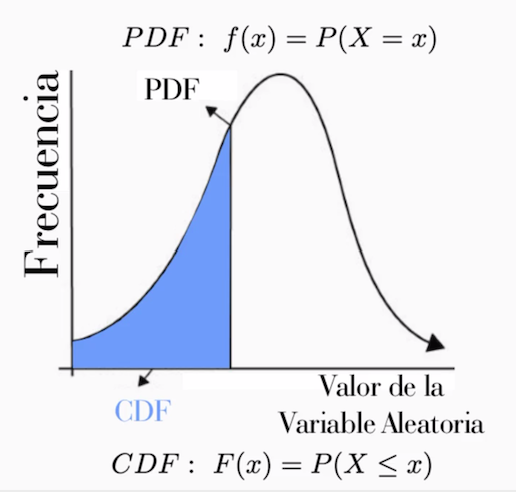

In [1]:
## Gráfico con distribución de probabilidad PDF y CDF vídeo 45 del curso
from IPython.display import Image
Image("resources/pdf.png")

## Distribución uniforme

La distribución uniforme `f(x) = 1 / (b - a)` indica que existe la misma probabilidad de obtener dos valores `a` y `b`. Que no hay unos valores más probables que otros. Son valores que llamamos "equiprobables".

Aquí el área obtenida de la función vuelve a ser 1.

Siempre habrá que especificar los puntos inicial y final de la función uniforme que se utiliza para generar los números aleatorios.

La función que usaremos para crear números aleatorios equiprobables, por tanto, es la siguiente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.getcwd()

'/Users/carlosdavila/Developer/Anaconda-projects/Curso-ml-python/notebooks'

In [3]:
a = 1
b = 100
n = 200
data = np.random.uniform(a, b, n)

Para comprobar la distribución uniforme usaremos un plot, para lo que habremos cargado la librería `matplotlib.pyplot` al comienzo del notebook.

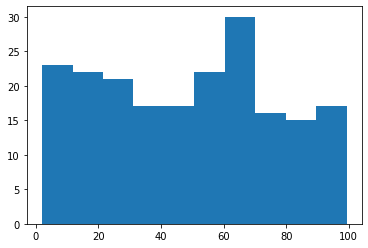

In [4]:
%matplotlib inline
plt.hist(data)
plt.show()

No aparece una distribución perfectamente equiprobable puesto que la muestra es pequeña. Ahora probaremos  multiplicando por 10 o por 100 la muestra hasta que aparezca una distribución más uniforme.

In [5]:
n1 = n*10
data1 = np.random.uniform(a, b, n1)

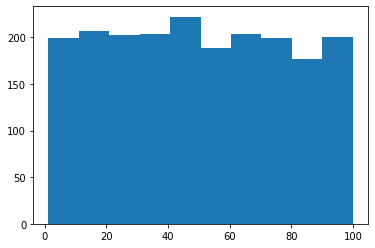

In [6]:
%matplotlib inline
plt.hist(data1)
plt.show()

In [7]:
n2 = n1*10
data2 = np.random.uniform(a, b, n2)

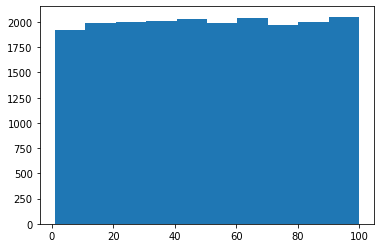

In [8]:
%matplotlib inline
plt.hist(data2)
plt.show()

In [9]:
n3 = n2*100
data3 = np.random.uniform(a,b,n3)

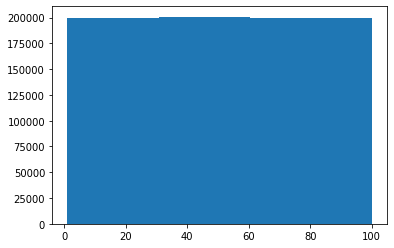

In [10]:
%matplotlib inline
plt.hist(data3)
plt.show()

Como vemos, a mayor cantidad de datos, la distribución se hace cada vez más uniforme.

## Distribución normal

Es la distribución más frecuente.

Los datos que definen una distribución normal son la media y la desviación típica. La media es el valor central y la desviación típica es $\pm$1.

Para generar números aleatorios con una distribución normal en python usaremos la función `randn` de la sublibrería `numpy.random` indicando los parámetros de la siguiente manera.

In [11]:
data = np.random.randn(100)

Primero dibujamos los datos que hemos creado.

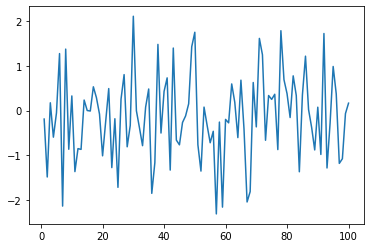

In [12]:
%matplotlib inline
x = range(1,101)
plt.plot(x, data)
plt.show()

Ahora veamos el histograma para comprobar la distribución normal.

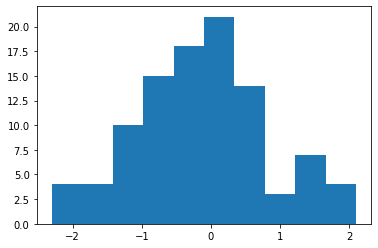

In [13]:
plt.hist(data)
plt.show()

Ocurre como antes. Al no ser tan grande la muestra, la distribución no es perfectamente normal. Para comprobarlo, creamos otro conjunto con una muestra de 1.000.000 de números.

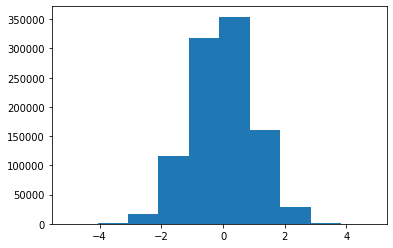

In [14]:
data1 = np.random.randn(1000000)
plt.hist(data1)
plt.show()

Para verlo mejor, vamos a realizar un número de divisiones según la regla de Sturges (ver notebook `T1-3-Data Cleaning-Plots`).

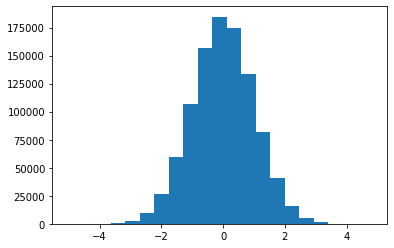

In [15]:
M = len(data1)
k = int(np.ceil(1 + np.log2(M)))

plt.hist(data1, bins = k)
plt.show()

Si ordenamos los datos que hemos creado y los representamos sobre un gráfico, el resultado será la **función de distribución acumulada.**

De esta manera podemos comprobar también la distribución gausiana.

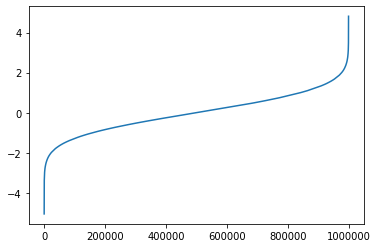

In [16]:
x = range(1, 1000001)
plt.plot(x, sorted(data1))

También podemos crear distribuciones con otras características, con una media que no sea 0 y una desviación típica que no sea 1. 

Lo hacemos pasando los siguientes parámetros a la función.

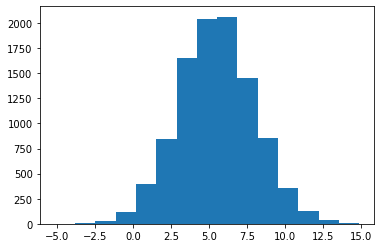

In [17]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
X = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
M = len(X)
k = int(np.ceil(1 + np.log2(M)))
plt.hist(X, bins = k)
plt.show()

La expresión empleada anteriormente `Z = (X - mu) / sd` se conoce como **teorema central del límite**. Lo que hace es transformar una variable cualquiera aleatoria en una normal estándar. Este proceso se conoce normalmente como tipificar.

Los parámetros son:
- `Z` los datos de una distribución normal
- `X` los datos de una distribución cualquiera
- `mu` la media
- `sd` la desviación estandar

Por tanto, para normalizar los datos de una distribución de datos cualquiera se despeja hasta obtener la expresión `X = mu + sd * Z`, que para una distribución normal sería `N(0,1), X = 0 + 1 * Z`.

A la función `randn` le podemos pasar como argumentos la cantidad y la longitud de muestras que deseamos obtener. Por ejemplo: generamos dos muestras de 4 valores aleatorios distribuidos normalmente de la siguiente manera.

In [18]:
data = np.random.randn(2,4)
data

array([[ 0.0879856 ,  0.37594671,  0.46237612,  1.0027838 ],
       [ 0.12184288, -0.95734965,  0.65743813,  0.16144768]])

Si no le pasáramos ningún argumento `randn` nos devolvería un único valor aleatorio.

## La simulación de Monte Carlo

En la simulación de Monte Carlo se consiguió demostrar empíricamente que la probabilidad de caer dentro de un círculo de radio conocido `r` circunscrito en un cuadrado de lado `2r` es igual a `π/4`. O lo que es lo mismo, se consiguió establecer una manera empírica de determinar decimales del número `π`.

Los pasos para recrear el experimento son seis.

**1.-** Generamos dos números aleatorios `x` e `y` entre 0 y 1 (esto es, tomaremos solamente el 1er cuadrante para reproducir el experimento. A efectos prácticos es lo mismo).

**2.-** Calcularemos `x^2 + y^2`
* Si el valor es inferior a 1 -> estamos dentro del círculo
* Si el valor es superior a 1 -> estamos fuera del círculo

**3.-** Calculamos el número total de veces que están dentro del círculo y lo dividimos por la cantidad total de intentos para obtener una aproximación de la probabiliad de caer dentro del círculo.

**4.-** Usamos dicha probabilidad para aproximar el valor de `π`.

**5.-** Repetimos el experimento un número suficiente de veces (p. ej. 1.000) como para obtener diferentes aproximaciones de `π`.

**6.-** Calculamos el promedio de los resultados obtenidos en los experimentos para dar un valor a `π`.

In [19]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp): 
        value = 0
        x = np.random.uniform(0,1, n).tolist()
        y = np.random.uniform(0,1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp 

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

Podemos ir variando el número de ensayos o la cantidad de intentos de caer en el círculo. Es decir, `n` o `n_exp`. 

Observaremos que el número obtenido del experimento siempre gira en torno a `π`.

3.141408000000001


(3.141408000000001, [<matplotlib.lines.Line2D at 0x11ecaf780>])

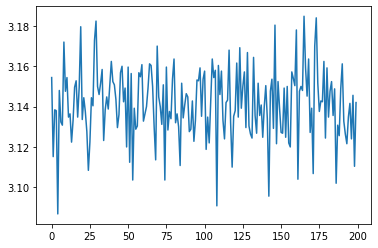

In [20]:
pi_montecarlo(10000, 200)

## Dummy Data Sets

Las funciones que hemos probado hasta ahora las emplearemos para crear sets de datos aleatorios que sirvan para comprobar que nuestros modelos funcionan.

Las claves de los **dummy data sets** son las siguientes:

* Se trata de una lista o array de números aleatorios generados mediante distintos métodos, de modo que cada uno de dichos métodos obtiene un vector columna que pasará a ser una columna del data frmae
* Los nombres de las columnas y sus descripciones las pasaremos como diccionario. Los nombres son las claves y los valores serán cada una de las colecciones de valores generados aleatoriamente.
* Todas las variables que creamos deben tener la misma longitud.

In [21]:
n = 1000000 # La longitud de cada variable y por tanto, del data frame
data = pd.DataFrame( # dentro se especifica el diccionario de la siguiente manera
    {
        'A' : np.random.randn(n), # Variable 'A', dist. normal entre 0 y 1
        'B' : 1.5 + 2.5 * np.random.randn(n), # Dist. normal de media 1.5 y sd = 2.5
        'C' : np.random.uniform(5, 32, n) # Dist. uniforme entre 5 y 32
    }
)

In [22]:
data.head()

,A,B,C
0,0.105441,-0.130952,27.080634
1,-0.703570,0.253742,30.013483
2,-0.605410,0.375061,9.420868
3,-2.087217,0.794199,30.480233
4,-0.581150,-3.364494,15.228888


Podemos comprobar que los resultados se ajustan a lo que hemos pedido haciendo un `describe`. De esta forma veremos que:
* La media de 'A' (d. normal entre 0,1) es 0 y la desviación estándar 1
* La media de 'B' está cerca de 1.5 y su desvest. de 2.5, como indicamos al crear el data set
* Los valores de 'C' se encuentran entre 5 y 32 (min y max), y la media está en el punto medio de los dos números: `mu = 5 + (32 - 5) / 2 = 18.5`.

In [23]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000342,1.500645,18.509712
std,0.999808,2.502607,7.793006
min,-4.633058,-11.680409,5.000060
25%,-0.674080,-0.186111,11.761044
50%,-0.000292,1.500371,18.509267
75%,0.674578,3.184252,25.262429
max,5.131561,13.685777,31.999992


También podemos comprobar las distribuciones meidante plots.

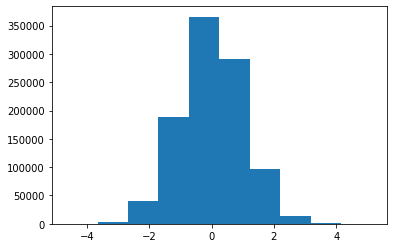

In [24]:
plt.hist(data["A"])
plt.show()

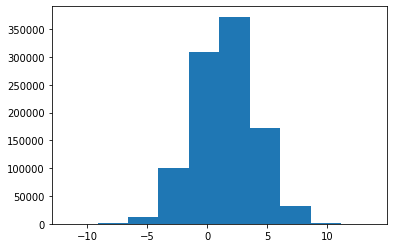

In [25]:
plt.hist(data["B"])
plt.show()

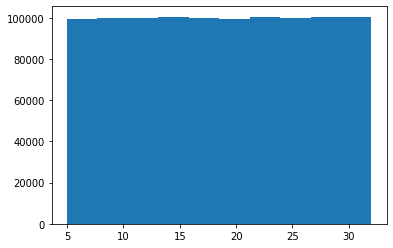

In [26]:
plt.hist(data["C"])
plt.show()

Podemos incluir variables categóricas a nuestros dummy data sets. El siguiente es un ejemplo muy sencillo.

Tomamos el dataset 'Customer churn model' y creamos un dummy data set con dos variables aleatorias como las que creamos anteriormente y otra variable con los nombres de las columnas del data set.

Las nuevas variables aleatorias deberán tener la misma longitud que la cantidad de columnas que tiene el data set en cuestión.

In [27]:
coursepath = "/Users/carlosdavila/Developer/GitHub/python-ml-course/datasets"
mypath = "/Users/carlosdavila/Developer/Anaconda-projects/Curso-ml-python/datasets"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(coursepath, filename)

In [28]:
data = pd.read_csv(fullpath)

In [29]:
column_names = data.columns.values.tolist()
n = len(column_names)

dummy_data = pd.DataFrame(
    {
        'Column Names' : column_names,
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    } , index = range(42, 42 + n) # de este modo podemos pedir que nos ponga los índices que nosotros queramos
)

In [30]:
dummy_data

,Column Names,B,C
42,State,2.941936,21.987128
43,Account Length,4.082201,30.047274
44,Area Code,0.176961,14.789507
45,Phone,1.968506,28.447204
46,Int'l Plan,-0.068726,27.930331
47,VMail Plan,1.169732,30.964732
48,VMail Message,0.814478,6.105959
49,Day Mins,2.904740,28.442762
50,Day Calls,3.256870,15.939474
51,Day Charge,2.251876,13.244433
